In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
print(os.listdir('/kaggle/input/fer2013/train'))

['fear', 'happy', 'sad', 'neutral', 'surprise', 'angry', 'disgust']


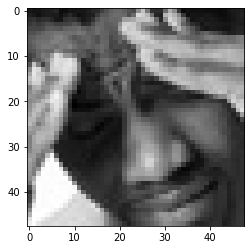

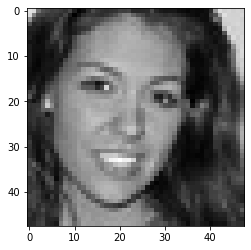

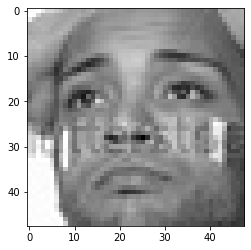

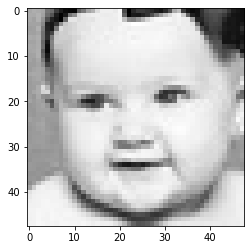

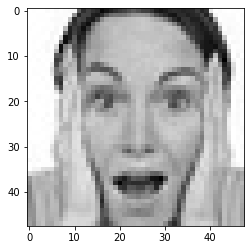

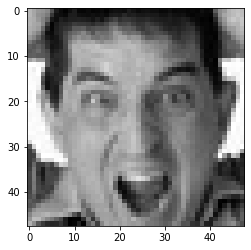

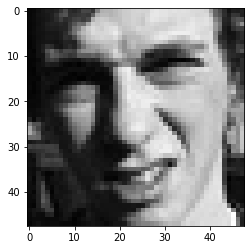

In [3]:
root='/kaggle/input/fer2013/train'
for d in os.listdir(root):
    images=os.listdir(root+'/'+d)
    #print(d)
    img=cv2.imread(root+'/'+d+'/'+images[0],0)
    #print(img.shape)
    plt.imshow(img,'gray')
    plt.show()
    

In [4]:
tot=0
for d in os.listdir(root):
    images=os.listdir(root+'/'+d)
    tot+=len(images)
    print('Images for '+d+' : ',len(images))
print('Total Images : ',tot)
    

Images for fear :  4097
Images for happy :  7215
Images for sad :  4830
Images for neutral :  4965
Images for surprise :  3171
Images for angry :  3995
Images for disgust :  436
Total Images :  28709


# **CNN**

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

In [6]:
print(tf.__version__)

2.3.0


In [7]:
#Image DataGenerator using flow_from_directory method
trainingDataGen=ImageDataGenerator(
                            rescale=1/255.0,
                            horizontal_flip=True,
                            zoom_range=0.2,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            validation_split=0.3
                           )

trainDataGen=trainingDataGen.flow_from_directory('/kaggle/input/fer2013/train',
                                         target_size=(48,48),
                                         batch_size=512,
                                         seed=29,
                                         subset='training',
                                        color_mode='grayscale'
                                            
                                        )
validDataGen=trainingDataGen.flow_from_directory('/kaggle/input/fer2013/train',
                                                 target_size=(48,48),
                                                 batch_size=512,
                                                 seed=29,
                                                 subset='validation',
                                                 color_mode='grayscale'
                                                )


testingDataGen=ImageDataGenerator(rescale=1/255.0)
testDataGen=testingDataGen.flow_from_directory('/kaggle/input/fer2013/test',
                                               seed=29,
                                               target_size=(48,48),
                                               color_mode='grayscale'
                                              )

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
# def scheduler(epoch,lr):
#     if epoch > 30:
#         if epoch%10==0:
#             return lr*0.1
#         else:
#             return lr
#     else:
#         return lr
        
# lrschedule=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [63]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='valid',input_shape=(48,48,1),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1024,activation='relu'))

model.add(tf.keras.layers.Dense(7,activation='softmax'))

In [64]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 128)       

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

In [66]:
history=model.fit(trainDataGen,epochs=100,validation_data=validDataGen,batch_size=512,shuffle=True)

Epoch 1/100
40/40 [==============================] - 34s 859ms/step - loss: 1.8260 - accuracy: 0.2399 - val_loss: 1.7964 - val_accuracy: 0.2559
Epoch 2/100
40/40 [==============================] - 33s 826ms/step - loss: 1.7917 - accuracy: 0.2507 - val_loss: 1.7850 - val_accuracy: 0.2533
Epoch 3/100
40/40 [==============================] - 31s 779ms/step - loss: 1.7861 - accuracy: 0.2503 - val_loss: 1.7884 - val_accuracy: 0.2518
Epoch 4/100
40/40 [==============================] - 31s 768ms/step - loss: 1.7730 - accuracy: 0.2607 - val_loss: 1.7767 - val_accuracy: 0.2525
Epoch 5/100
40/40 [==============================] - 31s 787ms/step - loss: 1.7593 - accuracy: 0.2687 - val_loss: 1.7499 - val_accuracy: 0.2725
Epoch 6/100
40/40 [==============================] - 31s 769ms/step - loss: 1.7416 - accuracy: 0.2791 - val_loss: 1.7471 - val_accuracy: 0.2769
Epoch 7/100
40/40 [==============================] - 31s 771ms/step - loss: 1.7284 - accuracy: 0.2869 - val_loss: 1.7161 - val_accuracy:

40/40 [==============================] - 31s 773ms/step - loss: 1.1267 - accuracy: 0.5724 - val_loss: 1.1642 - val_accuracy: 0.5578
Epoch 58/100
40/40 [==============================] - 31s 763ms/step - loss: 1.1326 - accuracy: 0.5712 - val_loss: 1.1642 - val_accuracy: 0.5611
Epoch 59/100
40/40 [==============================] - 31s 773ms/step - loss: 1.1247 - accuracy: 0.5696 - val_loss: 1.1564 - val_accuracy: 0.5584
Epoch 60/100
40/40 [==============================] - 32s 794ms/step - loss: 1.1178 - accuracy: 0.5763 - val_loss: 1.1598 - val_accuracy: 0.5541
Epoch 61/100
40/40 [==============================] - 30s 762ms/step - loss: 1.1210 - accuracy: 0.5740 - val_loss: 1.1632 - val_accuracy: 0.5524
Epoch 62/100
40/40 [==============================] - 30s 746ms/step - loss: 1.1112 - accuracy: 0.5792 - val_loss: 1.1540 - val_accuracy: 0.5613
Epoch 63/100
40/40 [==============================] - 30s 750ms/step - loss: 1.1116 - accuracy: 0.5782 - val_loss: 1.1544 - val_accuracy: 0.564

In [67]:
model.evaluate(testDataGen)

225/225 [==============================] - 15s 66ms/step - loss: 1.0314 - accuracy: 0.6176


[1.0314321517944336, 0.6175814867019653]

In [68]:
Y_true=testDataGen.classes
Y_pred=np.argmax(model.predict(testDataGen),axis=1)


In [69]:
confusion_matrix(Y_true,Y_pred)

array([[170,  10,  78, 214, 226, 135, 125],
       [ 14,   0,  13,  30,  15,  22,  17],
       [190,   6,  72, 257, 219, 154, 126],
       [303,  14, 127, 437, 375, 295, 223],
       [226,   4,  89, 301, 257, 204, 152],
       [207,   7,  82, 291, 265, 222, 173],
       [146,   3,  76, 203, 175, 112, 116]])